In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


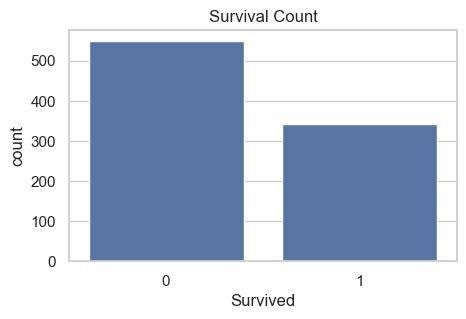

In [5]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(5,3))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count'); plt.show()

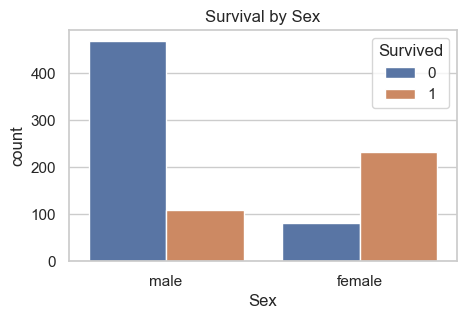

In [6]:
plt.figure(figsize=(5,3))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex'); plt.show()

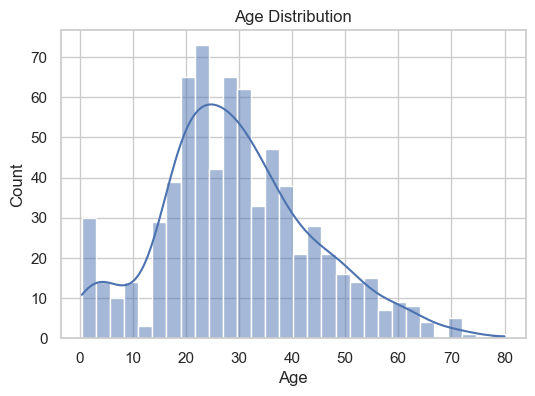

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution'); plt.show()

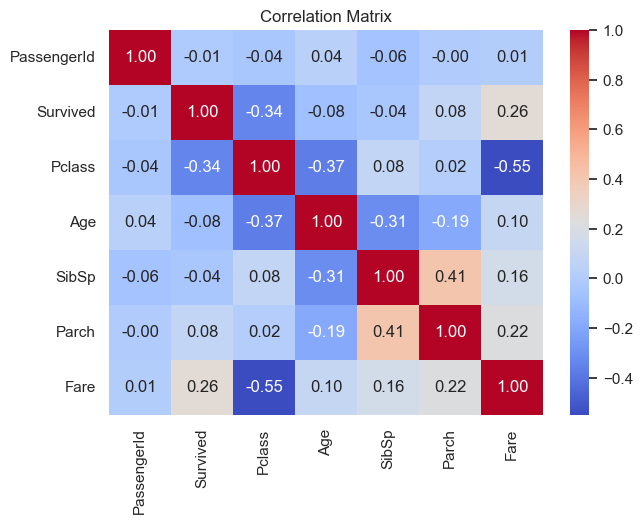

In [8]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix'); plt.show()

In [9]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [10]:
y = df["Survived"]
x =df.drop("Survived",axis=1)

In [11]:

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:

trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')


In [13]:

trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[1,6])
],remainder='passthrough')

In [14]:


trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])


In [15]:

model = DecisionTreeClassifier()

# Create Pipeline

In [16]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('model',model)
])

In [17]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('model', DecisionTreeClassifier())])

In [18]:
from sklearn import set_config
set_config(display='diagram')

In [19]:
p = pipe.predict(X_test)

In [20]:
accuracy_score(y_test,p)*100

62.56983240223464

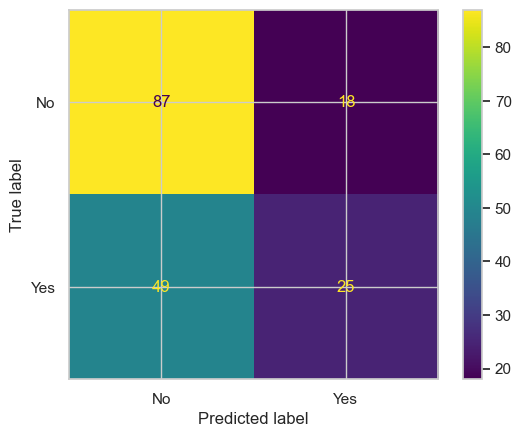

In [21]:
cm = confusion_matrix(y_test, p)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
display.plot()